# Imports

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import mean_absolute_error as mae, accuracy_score, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from preprocess import preprocess, process, league_train_test_split, league_fusion, league_split
from sklearn.multioutput import MultiOutputRegressor, MultiOutputClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
import tensorflow as tf
from tensorflow import keras

# Data

In [3]:
data = pd.read_csv('jobfair_train.csv')

In [4]:
data.head()

,season,club_id,league_id,dynamic_payment_segment,cohort_season,avg_age_top_11_players,avg_stars_top_11_players,avg_stars_top_14_players,avg_training_factor_top_11_players,days_active_last_28_days,...,registration_country,registration_platform_specific,league_match_won_count_last_28_days,training_count_last_28_days,global_competition_level,tokens_spent_last_28_days,tokens_stash,rests_stash,morale_boosters_stash,league_rank
0,173,6042825,2912348,2) Minnow,134,25,5.255151,4.483009,1.778801,25,...,Portugal,Flash FB Canvas,24,435,11.0,598,245,186,818,2
1,173,9620967,2912140,2) Minnow,28,23,4.962521,4.785648,-0.002687,28,...,Turkey,Android Phone,19,58,7.0,269,0,35,24,2
2,173,6045474,2912933,4) Whale,136,23,11.105782,10.511133,0.628794,28,...,Belgium,Flash FB Canvas,26,116,8.0,23180,369,444,4933,1
3,173,14187773,2910371,0) NonPayer,2,21,4.164848,4.023486,0.551904,12,...,Malaysia,Android Phone,11,22,2.0,41,43,213,126,6
4,173,13694853,2907632,0) NonPayer,5,22,3.031939,2.926029,0.690544,0,...,Italy,iOS Phone,9,0,4.0,0,16,100,147,10


In [ ]:
data.drop(['season', 'club_id'], axis=1, inplace=True)

# Data split

In [ ]:
data_train, data_test = league_split(data)

In [ ]:
data_train = preprocess(data_train, data_train['league_rank'])
data_test = process(data_test)

In [16]:
%%time
kaioken = 1
data_train = league_fusion(data_train, kaioken=kaioken)
data_test = league_fusion(data_test)
data_train.drop(['league_id'], axis=1, inplace=True)
data_test.drop(['league_id'], axis=1, inplace=True)

CPU times: total: 40min 5s
Wall time: 47min 20s


In [17]:
pred_columns = data_train.columns[-14:]
X_train = data_train.drop(pred_columns, axis=1)
Y_train = data_train[pred_columns]
X_test = data_test.drop(pred_columns, axis=1)
Y_test = data_test[pred_columns]

In [18]:
X_train

,cohort_season_1,avg_age_top_11_players_1,avg_stars_top_11_players_1,avg_stars_top_14_players_1,avg_training_factor_top_11_players_1,days_active_last_28_days_1,league_match_watched_count_last_28_days_1,session_count_last_28_days_1,playtime_last_28_days_1,league_match_won_count_last_28_days_1,...,Flash FB Canvas_14,Flash TE Site_14,UniversalWindows PC_14,WebGL FB Canvas_14,WebGL TE Site_14,WebGL or Flash FB Canvas_14,WebGL or Flash TE Site_14,iOS Phone_14,iOS Tablet_14,registration_country_encoded_14
0,76.0,24.0,5.100642,4.953686,0.652065,28.0,16.0,73.0,34707248.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.989048
1,76.0,24.0,5.100642,4.953686,0.652065,28.0,16.0,73.0,34707248.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.278672
2,74.0,22.0,5.082533,4.868886,0.525388,24.0,9.0,196.0,45706317.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.278672
3,78.0,26.0,5.073043,4.885886,0.692484,9.0,0.0,12.0,3819900.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.745882
4,130.0,28.0,5.201854,4.946562,0.660123,21.0,0.0,22.0,3313534.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.745882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324295,5.0,21.0,4.201527,4.001210,0.920557,27.0,18.0,175.0,239756890.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.515813
324296,2.0,23.0,3.347855,3.214076,0.642500,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.206576
324297,5.0,21.0,4.201527,4.001210,0.920557,27.0,18.0,175.0,239756890.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.206576
324298,2.0,23.0,3.347855,3.214076,0.642500,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.102579


In [19]:
%%time
X_train.to_csv(f'kaioken{kaioken}_train.csv', index=False)

CPU times: total: 2min 3s
Wall time: 2min 4s


In [20]:
X_test.to_csv(f'kaioken{kaioken}_test.csv', index=False)

In [21]:
Y_train.to_csv(f'kaioken{kaioken}_train_labels.csv', index=False)
Y_test.to_csv(f'kaioken{kaioken}_test_labels.csv', index=False)

In [2]:
X_train = pd.read_csv('kaioken100_train.csv')
X_test = pd.read_csv('kaioken100_test.csv')
Y_train = pd.read_csv('kaioken100_train_labels.csv')
Y_test = pd.read_csv('kaioken100_test_labels.csv')

# Model evaluation

### Xgboost

In [12]:
multi_xgb_regression = MultiOutputRegressor(XGBRegressor(max_depth=2, n_estimators=1024, device='cuda'), n_jobs=4)

In [16]:
%%time
multi_xgb_regression.fit(X_train, Y_train)

CPU times: total: 4.84 s
Wall time: 9min 8s


MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            device='cuda',
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=2,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=1024, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...),
                     n_jobs=4)

In [ ]:
for i in range(len(model.estimators_)):
    model.estimators_[i].set_params(device='cpu')

In [18]:
mae(Y_train, multi_xgb_regression.predict(X_train))

1.8046976230410319

In [19]:
mae(Y_test, multi_xgb_regression.predict(X_test))

1.9751526950779608

<AxesSubplot:>

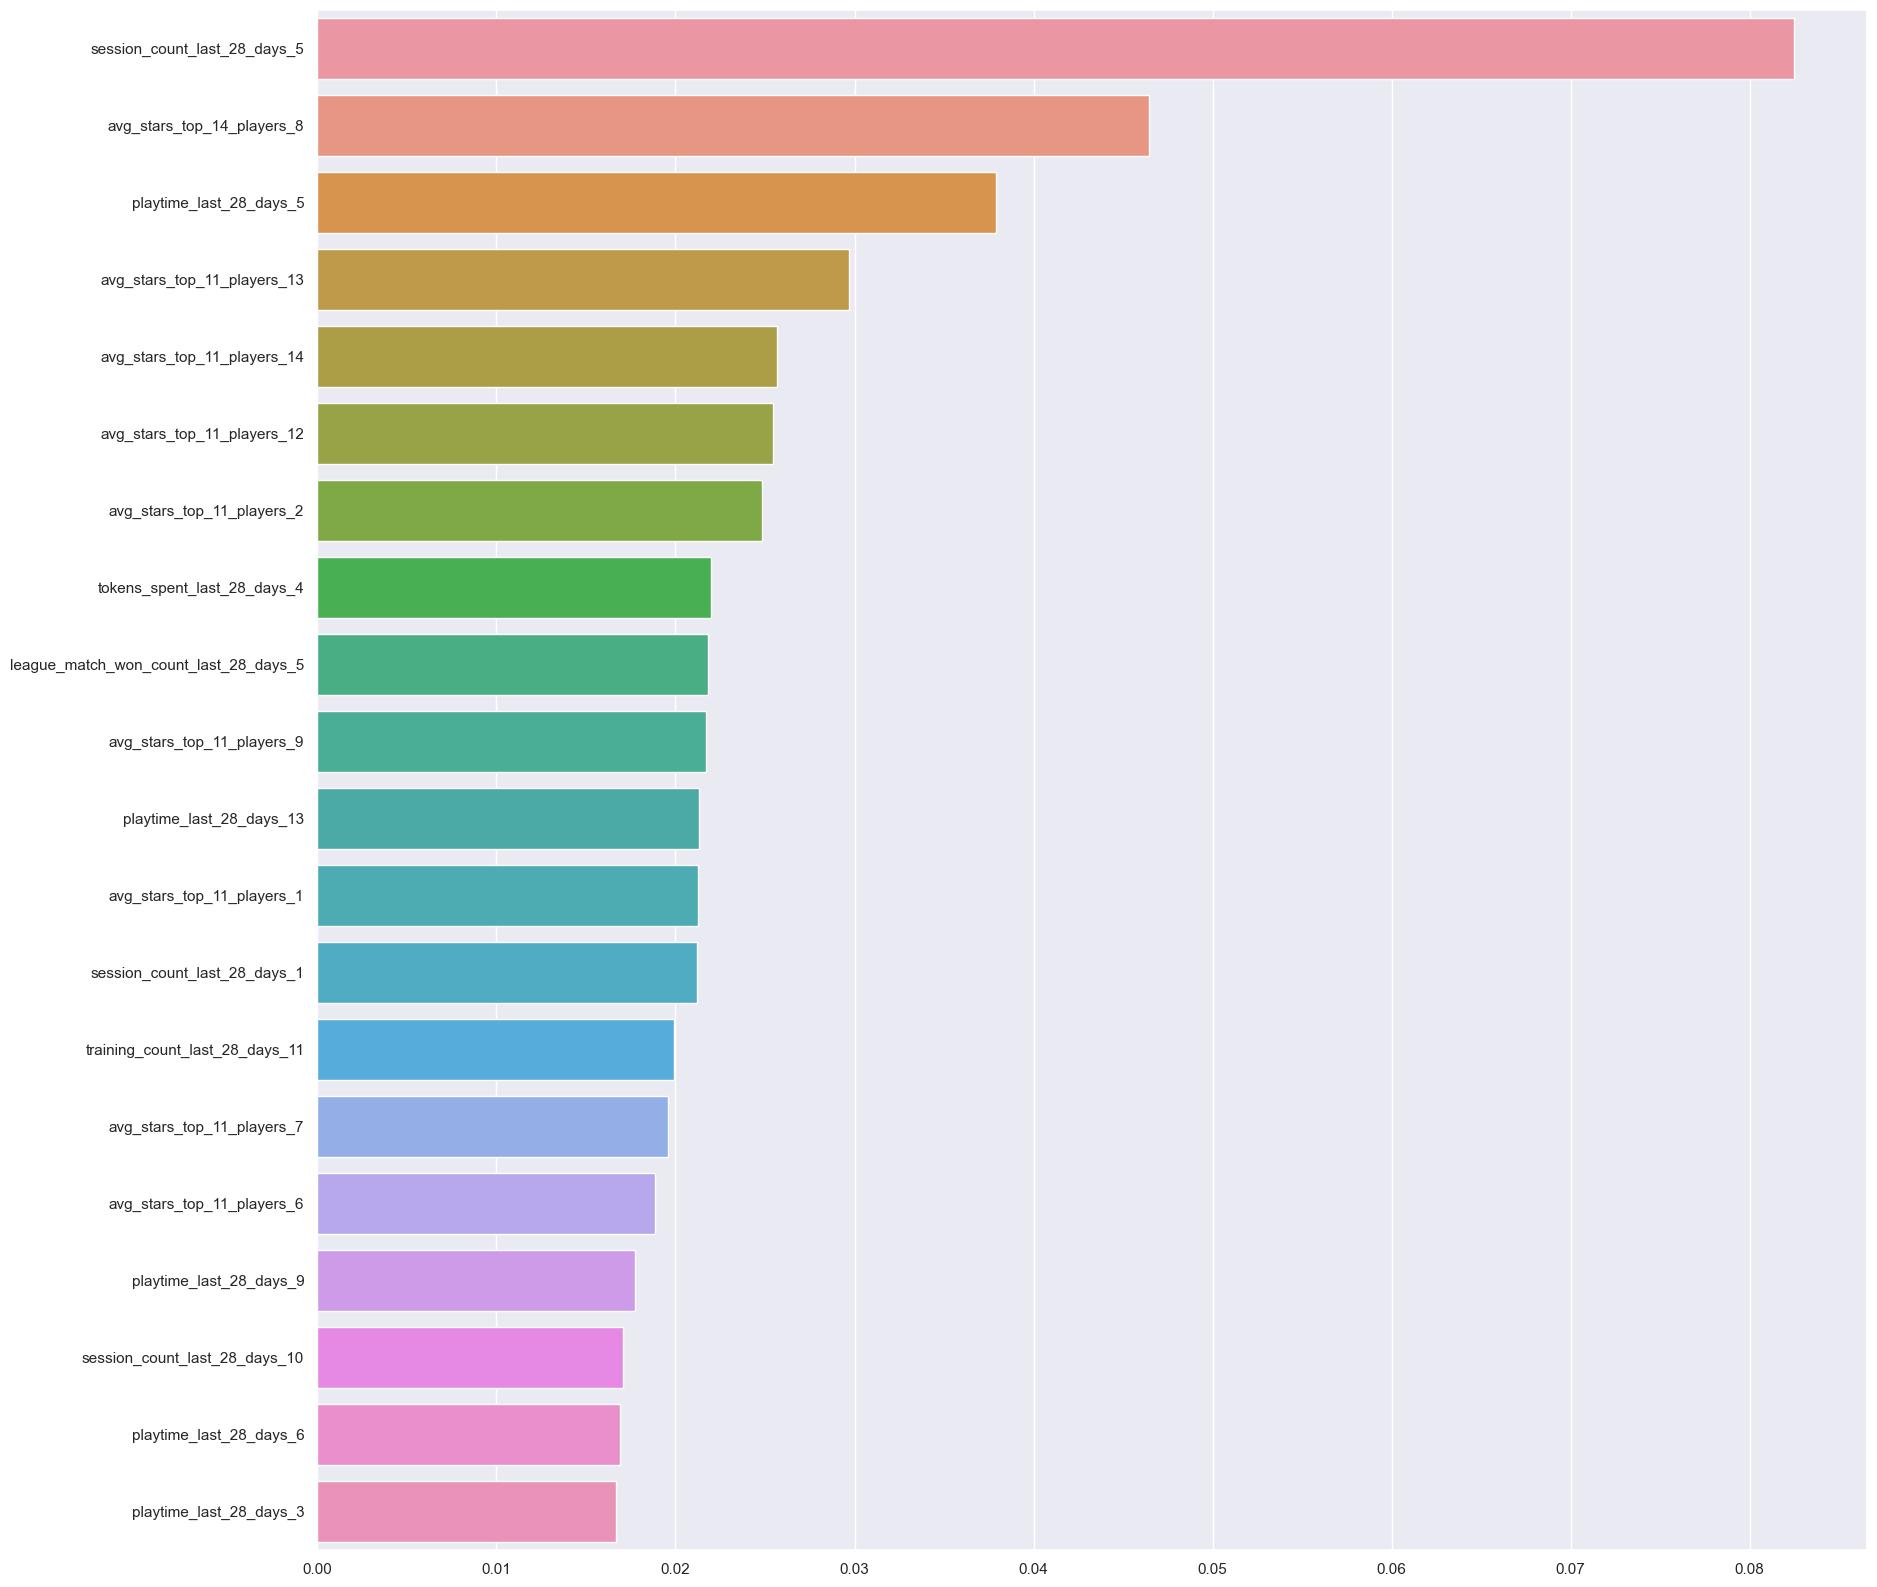

In [20]:
feature_imp = list(zip(*reversed(sorted(list(zip(multi_xgb_regression.estimators_[4].feature_importances_, X_train.columns))))))
sns.set(rc={'figure.figsize': (20, 20)})
sns.barplot(x=list(feature_imp[0])[:20], y=list(feature_imp[1])[:20])

### LinearRegression

In [3]:
standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)

In [22]:
multi_linear_regression = MultiOutputRegressor(LinearRegression(n_jobs=4), n_jobs=4)

In [34]:
%%time
multi_linear_regression.fit(X_train_scaled, Y_train)

CPU times: total: 4.5 s
Wall time: 2min 1s


MultiOutputRegressor(estimator=LinearRegression(n_jobs=4), n_jobs=4)

In [35]:
mae(Y_train, multi_linear_regression.predict(X_train_scaled))

2.042526304884102

In [36]:
mae(Y_test, multi_linear_regression.predict(X_test_scaled))

2.1370528884982347

### Neural Networks

In [4]:
neural_net = keras.Sequential([
    keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    keras.layers.Dense(360, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(360, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(14, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(14)
])

neural_net.compile(optimizer='Adam', 
                  loss='mean_squared_error',
                  metrics='mean_absolute_error')

In [55]:
%%time
with tf.device('gpu'):
    history = neural_net.fit(X_train_scaled, Y_train, epochs=100,
                             validation_data=(X_test_scaled, Y_test), callbacks=keras.callbacks.EarlyStopping(patience=10))

Epoch 1/100
10135/10135 [==============================] - 185s 18ms/step - loss: 5.8637 - mean_absolute_error: 1.8920 - val_loss: 6.6234 - val_mean_absolute_error: 2.0097
Epoch 2/100
10135/10135 [==============================] - 186s 18ms/step - loss: 5.8535 - mean_absolute_error: 1.8905 - val_loss: 6.6766 - val_mean_absolute_error: 2.0168
Epoch 3/100
10135/10135 [==============================] - 186s 18ms/step - loss: 5.8455 - mean_absolute_error: 1.8887 - val_loss: 6.6911 - val_mean_absolute_error: 2.0209
Epoch 4/100
10135/10135 [==============================] - 185s 18ms/step - loss: 5.8338 - mean_absolute_error: 1.8873 - val_loss: 6.6576 - val_mean_absolute_error: 2.0201
Epoch 5/100
10135/10135 [==============================] - 187s 18ms/step - loss: 5.8287 - mean_absolute_error: 1.8864 - val_loss: 6.6811 - val_mean_absolute_error: 2.0228
Epoch 6/100
10135/10135 [==============================] - 184s 18ms/step - loss: 5.8180 - mean_absolute_error: 1.8847 - val_loss: 6.6587 - 

In [56]:
mae(Y_train, neural_net.predict(X_train_scaled))

10135/10135 [==============================] - 48s 5ms/step


1.7760481012661127

In [9]:
mae(Y_test, neural_net.predict(X_test_scaled))

23/23 [==============================] - 5s 6ms/step


2.020976364528392

In [58]:
neural_net.save('kaioken_net.keras')

# --------------------------------

In [5]:
multi_neural_net = []
for i in range(14):
    nn = keras.Sequential([
    keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    keras.layers.Dense(360, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(360, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(14, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1)
    ])

    nn.compile(optimizer='Adam', 
                  loss='mean_squared_error',
                  metrics='mean_absolute_error')
    multi_neural_net.append(nn)

In [6]:
def train(model, X, y, epochs):
    with tf.device('gpu'):
        model.fit(X, y, epochs=epochs)

In [7]:
import threading

In [8]:
threads = []
epochs = 10
for i in range(14):
    thread = threading.Thread(target=train, args=(multi_neural_net[i], X_train_scaled, Y_train[f'league_rank_{i+1}'], epochs))
    threads.append(thread)

In [9]:
threads[0].start()
threads[1].start()
threads[0].join()
threads[1].join()

Epoch 1/10
Epoch 1/10
10135/10135 [==============================] - 246s 24ms/step - loss: 8.5547 - mean_absolute_error: 2.2523
Epoch 2/10
10135/10135 [==============================] - 248s 24ms/step - loss: 8.6012 - mean_absolute_error: 2.2569
Epoch 2/10
10135/10135 [==============================] - 242s 24ms/step - loss: 6.6314 - mean_absolute_error: 2.0269
Epoch 3/10
10135/10135 [==============================] - 244s 24ms/step - loss: 6.6362 - mean_absolute_error: 2.0288
Epoch 3/10
10135/10135 [==============================] - 262s 26ms/step - loss: 6.4563 - mean_absolute_error: 1.9971
Epoch 4/10
10135/10135 [==============================] - 266s 26ms/step - loss: 6.4414 - mean_absolute_error: 1.9942
Epoch 4/10
10135/10135 [==============================] - 255s 25ms/step - loss: 6.3087 - mean_absolute_error: 1.9689
Epoch 5/10
10135/10135 [==============================] - 245s 24ms/step - loss: 6.1727 - mean_absolute_error: 1.9476
Epoch 6/10
10135/10135 [=====================

In [10]:
threads[2].start()
threads[3].start()
threads[2].join()
threads[3].join()
threads[4].start()
threads[5].start()
threads[4].join()
threads[5].join()

Epoch 1/10
Epoch 1/10
10135/10135 [==============================] - 243s 24ms/step - loss: 8.5847 - mean_absolute_error: 2.2561
Epoch 2/10
10135/10135 [==============================] - 243s 24ms/step - loss: 8.5527 - mean_absolute_error: 2.2514
Epoch 2/10
10135/10135 [==============================] - 235s 23ms/step - loss: 6.6232 - mean_absolute_error: 2.0270
Epoch 3/10
10135/10135 [==============================] - 235s 23ms/step - loss: 6.6425 - mean_absolute_error: 2.0304
Epoch 3/10
10135/10135 [==============================] - 234s 23ms/step - loss: 6.4637 - mean_absolute_error: 2.0009
Epoch 4/10
10135/10135 [==============================] - 234s 23ms/step - loss: 6.4568 - mean_absolute_error: 1.9969
Epoch 4/10
10135/10135 [==============================] - 235s 23ms/step - loss: 6.3322 - mean_absolute_error: 1.9737
Epoch 5/10
10135/10135 [==============================] - 235s 23ms/step - loss: 6.2125 - mean_absolute_error: 1.9547
Epoch 6/10
10135/10135 [=====================

In [11]:
threads[6].start()
threads[7].start()
threads[6].join()
threads[7].join()
threads[8].start()
threads[9].start()
threads[8].join()
threads[9].join()

Epoch 1/10
Epoch 1/10
10135/10135 [==============================] - 240s 23ms/step - loss: 8.5349 - mean_absolute_error: 2.2493
Epoch 2/10
10135/10135 [==============================] - 242s 24ms/step - loss: 8.6020 - mean_absolute_error: 2.2559
Epoch 2/10
10135/10135 [==============================] - 242s 24ms/step - loss: 6.5737 - mean_absolute_error: 2.0189
Epoch 3/10
10135/10135 [==============================] - 238s 23ms/step - loss: 6.4055 - mean_absolute_error: 1.9906
Epoch 4/10
10135/10135 [==============================] - 240s 24ms/step - loss: 6.5219 - mean_absolute_error: 2.0066
Epoch 4/10
10135/10135 [==============================] - 236s 23ms/step - loss: 6.2655 - mean_absolute_error: 1.9655
Epoch 5/10
10135/10135 [==============================] - 239s 24ms/step - loss: 6.4108 - mean_absolute_error: 1.9878
Epoch 5/10
10135/10135 [==============================] - 239s 24ms/step - loss: 6.1512 - mean_absolute_error: 1.9438
Epoch 6/10
10135/10135 [=====================

Exception in thread Thread-14:
Traceback (most recent call last):
  File "D:\ProgramFiles\anaconda3\lib\threading.py", line 980, in _bootstrap_inner
    self.run()
  File "D:\ProgramFiles\anaconda3\lib\threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\ognje\AppData\Local\Temp\ipykernel_3012\448147911.py", line 3, in train
  File "C:\Users\ognje\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "D:\ProgramFiles\anaconda3\lib\site-packages\tensorflow\python\framework\constant_op.py", line 102, in convert_to_eager_tensor
    return ops.EagerTensor(value, ctx.device_name, dtype)
tensorflow.python.framework.errors_impl.InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.


Epoch 1/10
10135/10135 [==============================] - 195s 19ms/step - loss: 8.5424 - mean_absolute_error: 2.2531
Epoch 2/10
10135/10135 [==============================] - 191s 19ms/step - loss: 6.6434 - mean_absolute_error: 2.0309
Epoch 3/10
10135/10135 [==============================] - 191s 19ms/step - loss: 6.4642 - mean_absolute_error: 1.9989
Epoch 4/10
10135/10135 [==============================] - 193s 19ms/step - loss: 6.3429 - mean_absolute_error: 1.9772
Epoch 5/10
10135/10135 [==============================] - 193s 19ms/step - loss: 6.2218 - mean_absolute_error: 1.9548
Epoch 6/10
10135/10135 [==============================] - 191s 19ms/step - loss: 6.0949 - mean_absolute_error: 1.9335
Epoch 7/10
10135/10135 [==============================] - 193s 19ms/step - loss: 5.9602 - mean_absolute_error: 1.9080
Epoch 8/10
10135/10135 [==============================] - 195s 19ms/step - loss: 5.8609 - mean_absolute_error: 1.8911
Epoch 9/10
10135/10135 [==============================] 

In [12]:
threads[10].start()
threads[11].start()
threads[10].join()
threads[11].join()
threads[12].start()
threads[13].start()
threads[12].join()
threads[13].join()

Epoch 1/10
Epoch 1/10
10135/10135 [==============================] - 265s 26ms/step - loss: 6.5915 - mean_absolute_error: 2.0207
Epoch 3/10
10135/10135 [==============================] - 266s 26ms/step - loss: 6.6004 - mean_absolute_error: 2.0243
Epoch 3/10
10135/10135 [==============================] - 236s 23ms/step - loss: 6.4231 - mean_absolute_error: 1.9913
Epoch 4/10
10135/10135 [==============================] - 247s 24ms/step - loss: 6.2958 - mean_absolute_error: 1.9673
Epoch 5/10
10135/10135 [==============================] - 247s 24ms/step - loss: 6.2922 - mean_absolute_error: 1.9692
Epoch 5/10
10135/10135 [==============================] - 262s 26ms/step - loss: 6.1540 - mean_absolute_error: 1.9433
Epoch 6/10
10135/10135 [==============================] - 263s 26ms/step - loss: 6.1778 - mean_absolute_error: 1.9495
Epoch 6/10
10135/10135 [==============================] - 263s 26ms/step - loss: 6.0283 - mean_absolute_error: 1.9209
Epoch 7/10
10135/10135 [=====================

In [27]:
y_test_preds = np.empty((708, 0), int)
for nn in multi_neural_net:
    y_test_preds = np.concatenate((y_test_preds, nn.predict(X_test_scaled)), axis=1)

23/23 [==============================] - 0s 6ms/step
(708, 1)
23/23 [==============================] - 0s 6ms/step
(708, 1)
23/23 [==============================] - 0s 6ms/step
(708, 1)
23/23 [==============================] - 0s 6ms/step
(708, 1)
23/23 [==============================] - 0s 6ms/step
(708, 1)
23/23 [==============================] - 0s 6ms/step
(708, 1)
23/23 [==============================] - 0s 7ms/step
(708, 1)
23/23 [==============================] - 0s 6ms/step
(708, 1)
23/23 [==============================] - 0s 6ms/step
(708, 1)
23/23 [==============================] - 0s 6ms/step
(708, 1)
23/23 [==============================] - 0s 6ms/step
(708, 1)
23/23 [==============================] - 0s 6ms/step
(708, 1)
23/23 [==============================] - 0s 6ms/step
(708, 1)
23/23 [==============================] - 0s 6ms/step
(708, 1)
23/23 [==============================] - 0s 6ms/step


In [32]:
mae(Y_test, y_test_preds)

2.436504402808056